This project will be building a model to help universities applicants check their chances of getting into their desired universities. The data set is on schools in the US, Canada, and the UK. 

In [3]:
pip install ipywidgets


In [4]:
from ipywidgets import interact

# Function that takes a parameter and prints its square
def square_function(x):
    return x * x

# Use interact to create an interactive slider
interact(square_function, x=(0, 10))


interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.square_function(x)>

In [6]:
# Importing essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

Exploring the dataset

In [8]:
interact

# Loading the dataset
df = pd.read_csv('universitiesinfo.csv')

In [ ]:
df.head()

In [13]:
from ipywidgets import interact


# Returns number of rows and columns of the dataset
df.shape

(502, 10)

In [5]:
df.columns

Index(['Unnamed: 0', 'Serial No.', 'GRE Score', 'TOEFL Score',
       'University Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance of Admit'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0           float64
Serial No.           float64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research             float64
Chance of Admit      float64
dtype: object

In [7]:
df.isnull().any()

Unnamed: 0           True
Serial No.           True
GRE Score            True
TOEFL Score          True
University Rating    True
SOP                  True
LOR                  True
CGPA                 True
Research             True
Chance of Admit      True
dtype: bool

In [8]:
df.dropna(axis=0, thresh=2, inplace=True)  # Remove rows with more than 2 missing values
df.dropna(axis=1, thresh=2, inplace=True)  # Remove columns with more than 2 missing values


Data Visualization

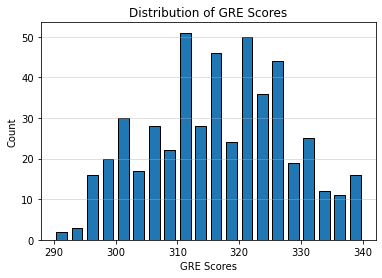

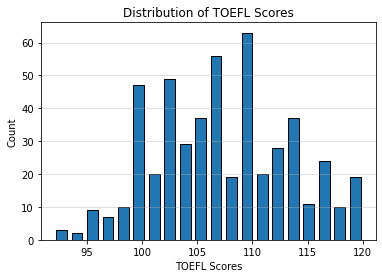

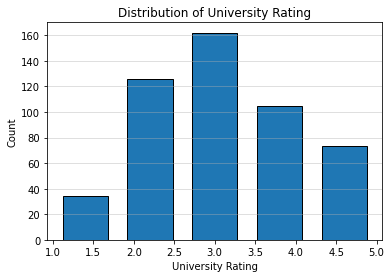

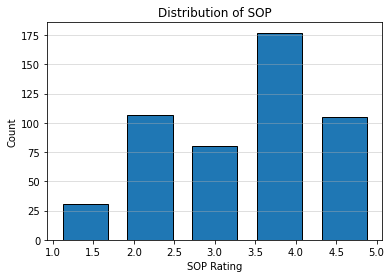

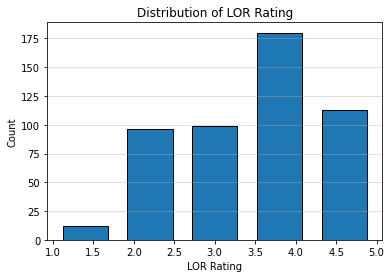

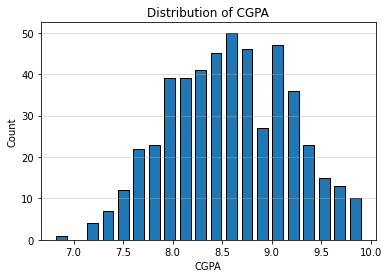

In [9]:
fig, ax = plt.subplots()
ax.hist(df['GRE Score'], bins=20, rwidth=0.7, edgecolor='black')
ax.grid(axis='y', alpha=0.5)
ax.set_title('Distribution of GRE Scores')
ax.set_xlabel('GRE Scores')
ax.set_ylabel('Count')
plt.show()

fig, ax = plt.subplots()
ax.hist(df['TOEFL Score'], bins=20, rwidth=0.7, edgecolor='black')
ax.grid(axis='y', alpha=0.5)
ax.set_title('Distribution of TOEFL Scores')
ax.set_xlabel('TOEFL Scores')
ax.set_ylabel('Count')
plt.show()

fig, ax = plt.subplots()
ax.hist(df['University Rating'], bins=5, rwidth=0.7, edgecolor='black')
ax.grid(axis='y', alpha=0.5)
ax.set_title('Distribution of University Rating')
ax.set_xlabel('University Rating')
ax.set_ylabel('Count')
plt.show()

fig, ax = plt.subplots()
ax.hist(df['SOP'], bins=5, rwidth=0.7, edgecolor='black')
ax.grid(axis='y', alpha=0.5)
ax.set_title('Distribution of SOP')
ax.set_xlabel('SOP Rating')
ax.set_ylabel('Count')
plt.show()

fig, ax = plt.subplots()
ax.hist(df['LOR'], bins=5, rwidth=0.7, edgecolor='black')
ax.grid(axis='y', alpha=0.5)
ax.set_title('Distribution of LOR Rating')
ax.set_xlabel('LOR Rating')
ax.set_ylabel('Count')
plt.show()

fig, ax = plt.subplots()
ax.hist(df['CGPA'], bins=20, rwidth=0.7, edgecolor='black')
ax.grid(axis='y', alpha=0.5)
ax.set_title('Distribution of CGPA')
ax.set_xlabel('CGPA')
ax.set_ylabel('Count')
plt.show()


Data Cleaning

In [10]:
# Removing the serial no, column
df.drop('Serial No.', axis='columns', inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [14]:
df_copy = df.copy(deep=True)
df_copy[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA']] = df_copy[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Model Building

In [15]:
# Splitting the dataset in features and label
X = df_copy.drop('Chance of Admit', axis='columns')
y = df_copy['Chance of Admit']

In [24]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True, False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto', 'scale']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                'splitter': ['best', 'random']
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(),
            'parameters': {
                'n_estimators': [5, 10, 15, 20],
                'criterion': ['mse', 'mae', 'poisson']
            }
        },
        
        'knn': {
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2, 5, 10, 20]
            }
        }
    }
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores)


    return pd.DataFrame(scores, columns=['model','best_parameters','score'])


Splitting the dataset into train and test samples

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(len(X_train), len(X_test))

400 100


Creating Linear Regression Model

In [44]:

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8188432567829627

Because Linear Regression algorithm has the highest accuracy, we will use this model.

In [28]:
# Using cross_val_score for gaining highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, cv=5)
print('Highest Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Highest Accuracy : 81%


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.06086588041578314


Predicting the values using the trained model

In [46]:
# Prediction 1
# Input in the form : GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Chance of admit
print('Chance of getting into Queens college is {}%'.format(round(model.predict([[337, 118, 4, 4.5, 4.5, 9.65, 0]])[0]*100, 3)))

Chance of getting into Queens college is 93.437%


C:\Users\habay\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
# Prediction 2
print('Chance of getting into Queens college is {}%'.format(round(model.predict([[320, 113, 2, 2.0, 2.5, 8.64, 1]])[0]*100, 3)))

Chance of getting into Queens college is 74.423%


C:\Users\habay\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model Interpretation

In [48]:
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [49]:
# Retrieve the coefficients (weights) of the features
coefficients = model.coef_


In [50]:
# Create a DataFrame to associate feature names with coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the coefficients in descending order of magnitude
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)


In [ ]:
Visualizing the Coefficients

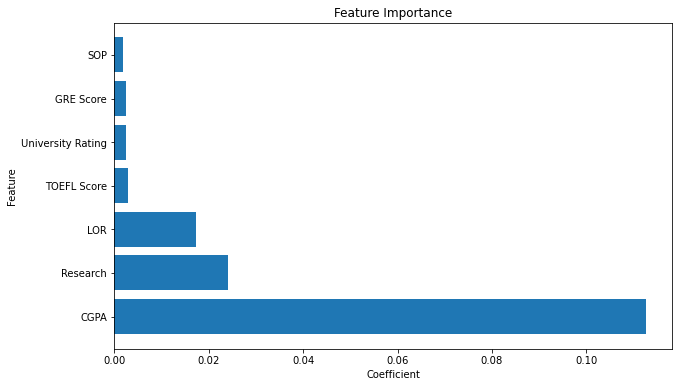

In [51]:
import matplotlib.pyplot as plt

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


Summary

In this project, I have built a linear regression model to help university applicants assess their chances of getting into their desired universities. The model is trained using a dataset containing features such as GRE score, TOEFL score, university rating, statement of purpose (SOP), letter of recommendation (LOR), CGPA, and research experience. The target variable is the chance of admission.

I started by loading the dataset and performing exploratory data analysis (EDA) to gain insights into the data distribution and identify any patterns or correlations. I then preprocessed the data by splitting it into training and testing sets and performed feature scaling to ensure fair weightage to each feature during model training.

Next, I trained a linear regression model on the training data. The model learned the relationships between the input features and the target variable. I evaluated the model's performance using the R-squared score, which indicates how well the model fits the data.

To help applicants predict their admission chances I utilized the trained model to make predictions on new input data. Two examples of prediction inputs were provided, showcasing how applicants can input their own scores and credentials to obtain an estimated chance of admission.

Additionally, I explored model interpretation to understand the importance of each feature in determining admission chances. By analyzing the coefficients obtained from the linear regression model, I identified which features had the most significant impact on admission chances. This information can provide valuable insights to university applicants, allowing them to focus on improving specific areas, such as increasing their GRE score or CGPA, to enhance their chances of admission. Also in countries where applicants have a limit to the numbers of schools they can apply to or where they have to pay for each application, this tool can help them narrow their focus to their best chances.

Overall, this project benefits university applicants by providing them with a quantitative tool to assess their chances of getting into their desired universities. By inputting their academic credentials, applicants can obtain an estimated probability of admission, which can help them make informed decisions and potentially improve their chances by identifying areas of improvement. This model serves as a useful resource for applicants to strategize and work towards achieving their academic goals.